# PSO - ALOCAÇÃO DE TEMPO PARA CURSO DE EXTENSÃO


Problema a ser resolvido: Um curso de extensão (13h) será ministrado segunda, terça e quarta em um determinado mês em um ano.

3 turmas se interessaram, mas os horários não batem.

O algoritmo deve analisar 6 horários diferentes (seg, ter e qua de manhã e de tarde) e aumentar o aproveitamento das 3 turmas em relação ao curso.

Otimizar o calendário do curso para que as 3 turmas vejam o máximo possível do curso.

Esse tipo de algoritmo é baseado no comportamento coletivo de animais.

Aplicações: simulação do comportamento social de animais, problemas científicos de engenharia e otimização de funções matemáticas.

Devido à inércia, o animal irá mudar aos poucos a sua direção. 

O algoritmo irá fazer as partículas se aproximarem cada vez mais da solução do problema ao sempre seguir o indivíduo mais bem adequado para cada momento.

Supondo uma sala com uma fonte de calor e várias pessoas, se as pessoas se moverem em direção à pessoa mais próxima à fonte, a pessoa mais próxima da fonte de calor pode passar a ser outra pessoa. Assim o algoritmo vai convergindo até a melhor resposta.

Inércia faz o espaço de soluções percorrido ser maior.

No caso do problema do curso, a fonte de calor seria o curso conseguir um aproveitamento de 39h de aula juntando as 3 turmas. 

A partícula que se aproximar disso é a melhor solução.

![](enxame.jpg)

![](inercia.jpg)

1 - Inicializar a população.

2 - Avaliar o fitness.

3 - Comparar o valor de cada partícula com seus valores anteriores.

4 - Comparar o valor de todas as partículas para achar o melhor.

5 - Atualizar a posição e velocidade de cada partícula.

6 - Loop para o passo 2 até chegar no critério de parada.

Hiperparâmetros:

- Inércia(w) = Importância da partícula continuar na direção que está.

- c1 = coeficiente cognitivo. Ao aumentar, valoriza mais as posições e velocidades de uma mesma partícula do que da melhor partícula ou do todo.

- c2 = coeficiente social. Ao aumentar, valoriza mais a melhor posição encontrada no enxame.

Cada partícula é um vetor composto pela posição anterior, pela posição atual e a velocidade.

As posições são vetores que mudam com a dimensionalidade do problema.

![](alg.jpg)

![](calc.jpg)

![](vet.jpg)

Função objetiva deve analisar o aproveitamento das 3 turmas e otimizar issso.

Aproveitamento total = (aprov1 + aprov2 + aprov3)/39

39 = 3 * 13


Cada posição de uma partícula é um vetor de 6 dimensões.

In [278]:
import numpy as np
import random
import matplotlib.pyplot as plt

w = 0.7
c1 = 0.7
c2 = 0.7

Criando partícula

In [279]:
def particula():
  while True:
    particula = []
    pos1 = []
    pos2 = []
    for i in range(6):
      rand = random.randint(0,3) + random.random() # O maior espaço de tempo disponível por uma turma é 4h em um dos horários
      rand2 = random.randint(0,3) + random.random()
      pos1.append(rand)
      pos2.append(rand2)
    vel = [0,0,0,0,0,0]
    particula.append(pos1)
    particula.append(pos2)
    particula.append(vel)
    if sum(particula[0]) <= 13 and sum(particula[1]) <=13:
      return particula
      break

In [280]:
particula()

[[0.7969030961610101,
  0.12791662164094886,
  0.5451598751947984,
  0.07381476861484126,
  3.5736600112501633,
  2.608113617176654],
 [2.299477477817094,
  2.7417777393242666,
  1.293563368554931,
  0.8952120839886862,
  1.5059094648211824,
  2.018877685389105],
 [0, 0, 0, 0, 0, 0]]

Criando população

In [281]:
def populacao(quant):
  particulas = []
  for i in range(quant):
    particulas.append(particula())
  return particulas

In [282]:
pop = populacao(20)

print(pop[0])
print(pop[2])
print(len(pop))

[[0.7435582169143281, 3.735016832703337, 3.9117298174479394, 0.533058031951274, 1.5625060497336127, 0.9650573369439601], [2.437894856013672, 0.5089099320001762, 3.208748557357855, 1.6445787929874096, 0.6147063258677293, 2.2615358973869983], [0, 0, 0, 0, 0, 0]]
[[1.462706359005731, 2.521035158868888, 1.916110363559362, 0.9029635567212617, 0.16382854136830316, 0.03693714365081535], [0.439568173571134, 2.7170317055765056, 0.8923698454467885, 3.265668274723251, 2.6968512639976634, 0.9911571161218994], [0, 0, 0, 0, 0, 0]]
20


FUNÇÃO FITNESS

In [283]:
def avalia(particula,indice):
  turma1 = [3,2,1,2,4,2.5]
  turma2 = [1,4,0,2,4,1.5]
  turma3 = [1.5,2.5,1,2,3.5,1.5]
  turmas = [turma1,turma2,turma3]
  if sum(particula[indice]) <= 13:
    soma = 0
    for turma in turmas:
      cont = 0
      while cont < len(particula[indice]):
        dupla = [particula[indice][cont],turma[cont]]
        minimo = min(dupla)
        soma += minimo
        cont += 1
    return soma/39
  else:
    return 0.01 # Nota ruim para partículas que passam de 13 horas

In [284]:
p = particula()
print(p[0])
print(p[1])

[3.236780761073544, 2.08690565967023, 2.0332719508421917, 1.8059369471573299, 0.4178462776326163, 1.822833799271169]
[0.40178240988742764, 0.9707289671543464, 3.639095737996213, 1.0446238019516692, 3.980444762216256, 1.6086737489569924]


In [285]:
avalia(p,1)

0.6492556105223035

FUNÇÃO DA MELHOR POSIÇÃO INDIVIDUAL DA PARTÍCULA

In [286]:
def pbest(particula):
  valores = []
  cont = 0
  while cont < 2:
    if cont == 0:
      melhor = particula[0]
    elif cont == 1:
      if avalia(particula,cont) > avalia(particula,0):
        melhor = particula[1]
    cont += 1
  return melhor

In [287]:
p = particula()
print(p[0])
print(avalia(p,0))
print()
print(p[1])
print(avalia(p,1))

[2.692212581330883, 2.476847730774983, 0.27132953713770247, 0.4578007165751885, 2.640020340508234, 1.3593229748810045]
0.6682051080269112

[0.6192767676080928, 0.2949035675129651, 1.1052669235750443, 1.5943833807194987, 2.4570453873603983, 0.24942682159383756]
0.45243866088165074


In [288]:
pbest(p)

[2.692212581330883,
 2.476847730774983,
 0.27132953713770247,
 0.4578007165751885,
 2.640020340508234,
 1.3593229748810045]

MELHOR GLOBAL (GBEST)

In [289]:
def avalia_simples(part): # Serve para avaliar uma posição específica de uma partícula
  turma1 = [3,2,1,2,4,2.5]
  turma2 = [1,4,0,2,4,1.5]
  turma3 = [1.5,2.5,1,2,3.5,1.5]
  turmas = [turma1,turma2,turma3]
  if sum(part) <= 13:
    soma = 0
    for turma in turmas:
      cont = 0
      while cont < len(part):
        dupla = [part[cont],turma[cont]]
        minimo = min(dupla)
        soma += minimo
        cont += 1
    return soma/39
  else:
    return 0.01

def gbest(populacao_gerada): # Serve para achar a melhor posição global
  pbests = []
  for i in populacao_gerada:
    pbests.append(list(pbest(i))) # Melhores posições de cada partícula
  
  for indice in pbests:
    if pbests.index(indice) == 0: # Primeira posição
      gbest = pbests[0]
    else:
      if avalia_simples(indice) > avalia_simples(gbest):
        gbest = indice # Selecionando o melhor valor global dos melhores valores individuais de cada partícula 
  return gbest

In [290]:
pop = populacao(20)
melhor = gbest(pop)
print(melhor)
print(avalia_simples(melhor))

[1.557740407544708, 3.7187914991517523, 0.28269306438079533, 1.3046681100215354, 3.229370283385405, 2.7108789173778742]
0.8190777747609967


In [291]:
sum(melhor)

12.80414228186207

ATUALIZAÇÃO DA VELOCIDADE DA PARTÍCULA

In [292]:
def nova_velocidade(part,pop):
  r1 = random.random()
  r2 = random.random()
  vel = part[2] 
  nova_v = w*np.array(vel) + c1*r1*(np.array(pbest(part))-np.array(part[1])) + c2*r2*(np.array(gbest(pop))-np.array(part[1]))
  return nova_v

In [293]:
pop = populacao(20)
p = pop[0]
vel = p[2]
nova_vel = nova_velocidade(p,pop)
print(p)
print(vel)
print(nova_vel)

[[2.0347690442395536, 0.9041376953080797, 1.0416251346892649, 1.6607134052423933, 1.4914164576367195, 0.4288612687383644], [1.8294976166161487, 3.7091954072393034, 0.25432316650700226, 1.1632853331053616, 2.7020909258433097, 2.8017862021076283], [0, 0, 0, 0, 0, 0]]
[0, 0, 0, 0, 0, 0]
[0. 0. 0. 0. 0. 0.]


Nova posição e nova partícula

In [294]:
def nova_posicao(p,pop):
  nvel = nova_velocidade(p,pop)
  nova = p[1] + nvel
  return nova


#### IMPORTANTE
# SE UMA NOVA POSIÇÃO DE UMA PARTÍCULA TIVER SOMA MAIOR QUE 13, A AVALIAÇÃO DESSA POSIÇÃO SERÁ 0.01, O QUE É BEM RUIM
# ASSIM, ESSA POSIÇÃO NÃO SERÁ pbest E MUITO MENOS gbest, ENTÃO LOGO SERÁ DESCARTADA. 
# ISSO É O QUE GARANTE QUE AS PARTÍCULAS IRÃO EVOLUIR, MAS AS MELHORES NUNCA SERÃO AS QUE PASSAM DE 13 HORAS.


def nova_particula(p,pop):
  nova_p = [pbest(p),nova_posicao(p,pop),nova_velocidade(p,pop)]
  # A melhor posição antes se torna a posição anterior. 
  # Isso elimina a possibilidade de se perder uma boa posição por ficar com uma posição aleatória de início ruim
  return nova_p

In [295]:
pop1 = populacao(20)
p1 = pop1[0]
nova_part = nova_particula(p1,pop1)

print(p1)
print()
print(nova_part)

[[0.032620806314033746, 2.2917522673516464, 3.062986008567524, 0.053793927476130765, 0.3338311711845867, 0.21326839198143854], [1.5564030971063323, 2.2968927255666545, 0.3026100547708458, 3.236442534762589, 2.5941249954323533, 2.771982229318], [0, 0, 0, 0, 0, 0]]

[[1.5564030971063323, 2.2968927255666545, 0.3026100547708458, 3.236442534762589, 2.5941249954323533, 2.771982229318], array([1.5564031 , 2.29689273, 0.30261005, 3.23644253, 2.594125  ,
       2.77198223]), array([0., 0., 0., 0., 0., 0.])]


### EXECUÇÃO DO ALGORITMO

[1.0178640896303717, 1.4675675741353582, 0.8968574937831588, 3.095647852983944, 3.7311389843654714, 2.2996443920262992]
0.8075402115382149
12.508720386924603

[1.59170076627655, 1.4402736023533886, 1.235097737755852, 2.6994592750769226, 3.4719793409438156, 1.937306129650496]
0.8145068134825296
12.375816852057026

[1.380696542792677, 1.7666326458792434, 0.7646727125916672, 2.6393102519101728, 3.334766860365697, 2.5075028508337835]
0.8229471033206028
12.393581864373242

[1.3776741706112714, 1.8874625595213745, 1.0785995003761317, 2.82255522075769, 3.644923820242531, 1.834502674648237]
0.8472329829466657
12.645717946157236

[1.3776741706112714, 1.8874625595213745, 1.0785995003761317, 2.82255522075769, 3.644923820242531, 1.834502674648237]
0.8472329829466657
12.645717946157236

[1.3689316174010537, 2.38678685961551, 0.3937053295082003, 2.164124314769477, 3.825219690790416, 2.7937462755700238]
0.8704945383238553
12.932514087654681

[1.411424824128362, 2.37501082697429, 0.7390827043856598, 2

Text(0.5, 1.0, 'Aproveitamento do curso (%)')

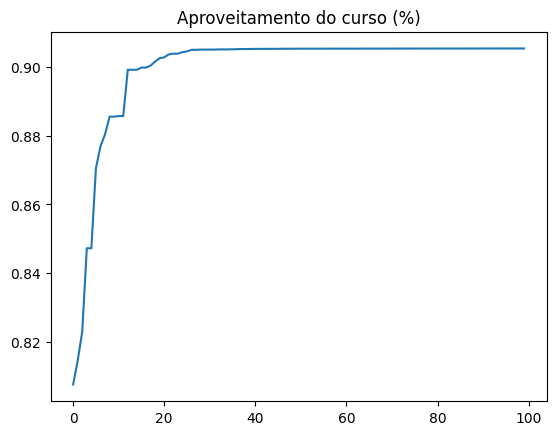

In [296]:
population = populacao(20)
valores = []
grafico = []

for i in range(100): # Gerações
  melhor = gbest(population) # Melhor posição global (vetor com 6 dimensões)
  novaPop = []
  for j in population:
    nova_part = nova_particula(j,population)
    novaPop.append(nova_part)
  population = novaPop
  grafico.append(avalia_simples(melhor))
  print(melhor)
  print(avalia_simples(melhor))
  print(sum(melhor))
  print()

plt.plot(grafico)
plt.title('Aproveitamento do curso (%)')
